<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_id             5232 non-null   int64  
 1   location_name           5232 non-null   object 
 2   iso3                    5136 non-null   object 
 3   level                   5232 non-null   object 
 4   year                    5232 non-null   int64  
 5   the_total_mean          5232 non-null   int64  
 6   the_total_lower         5232 non-null   int64  
 7   the_total_upper         5232 non-null   int64  
 8   the_total_ppp_mean      5232 non-null   int64  
 9   the_total_ppp_lower     5232 non-null   int64  
 10  the_total_ppp_upper     5232 non-null   int64  
 11  ghes_total_mean         5232 non-null   int64  
 12  ghes_total_lower        5232 non-null   int64  
 13  ghes_total_upper        5232 non-null   int64  
 14  ghes_total_ppp_mean     5232 non-null   

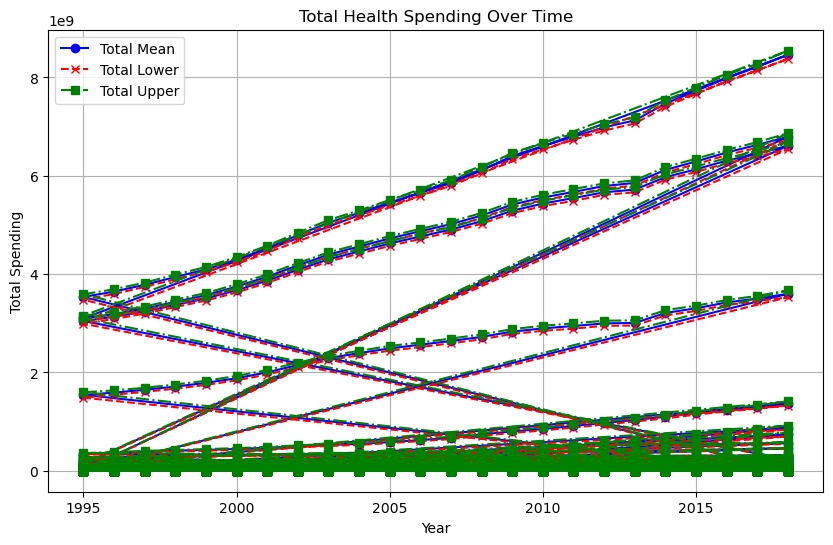

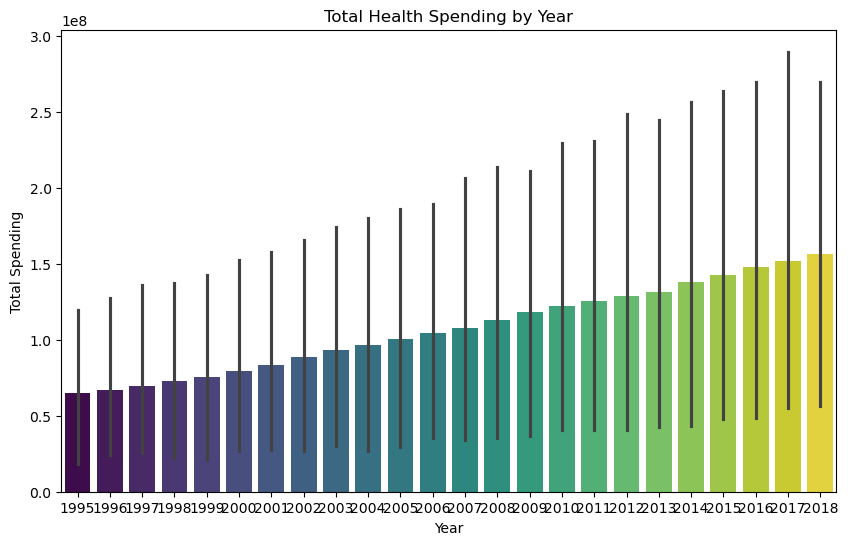

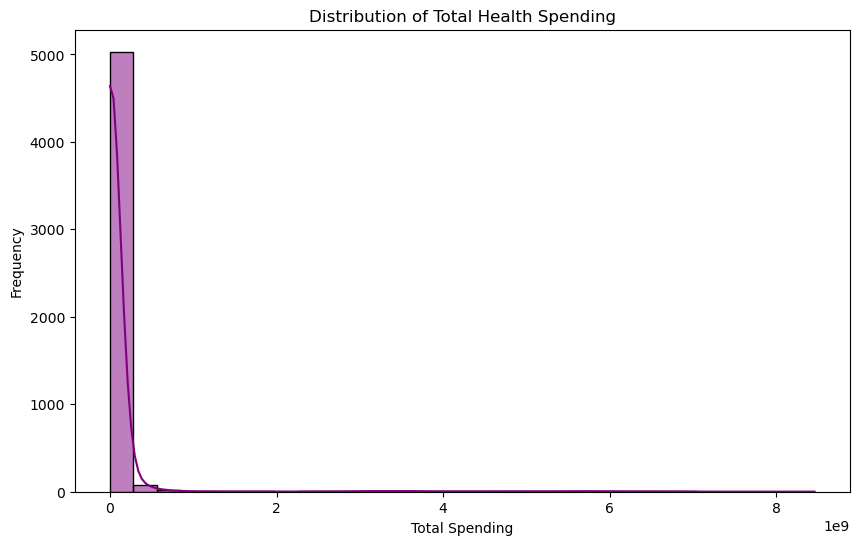

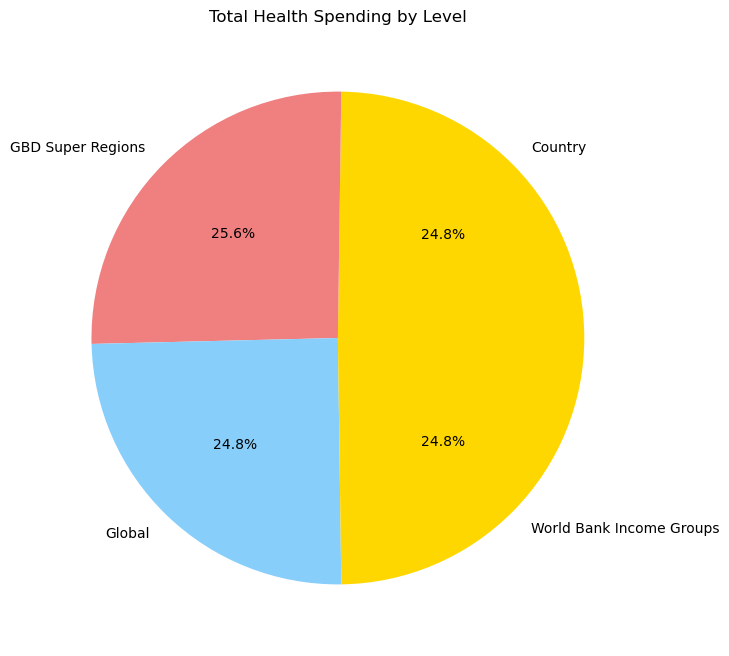

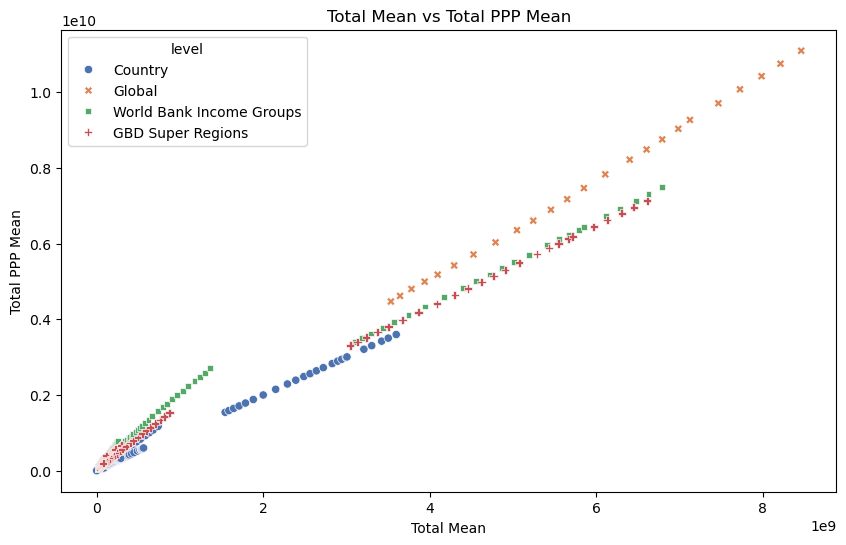

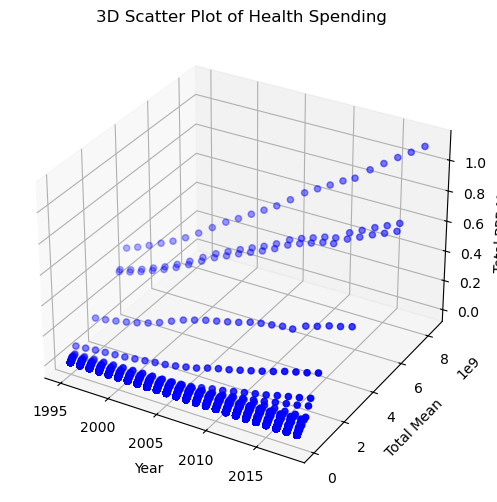

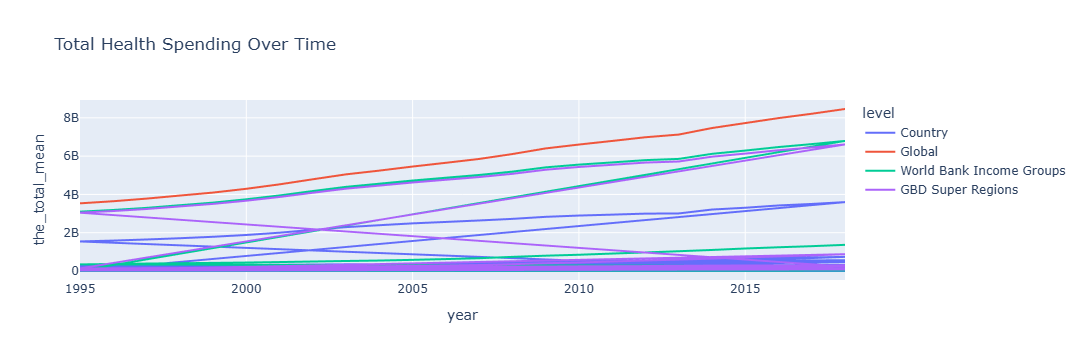

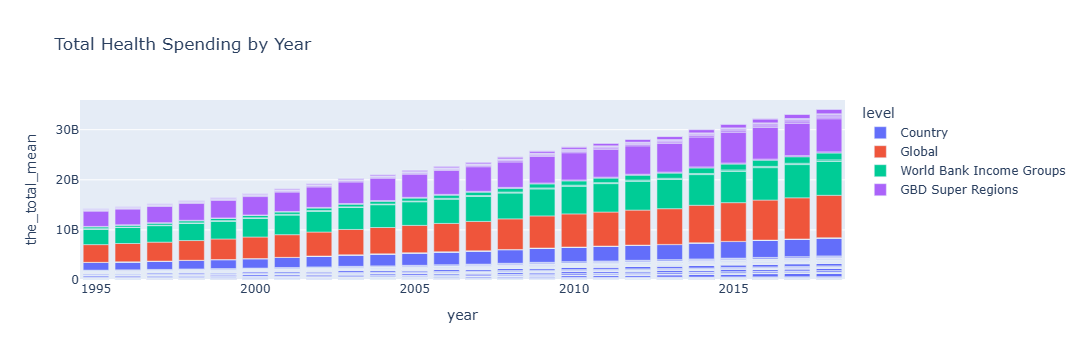

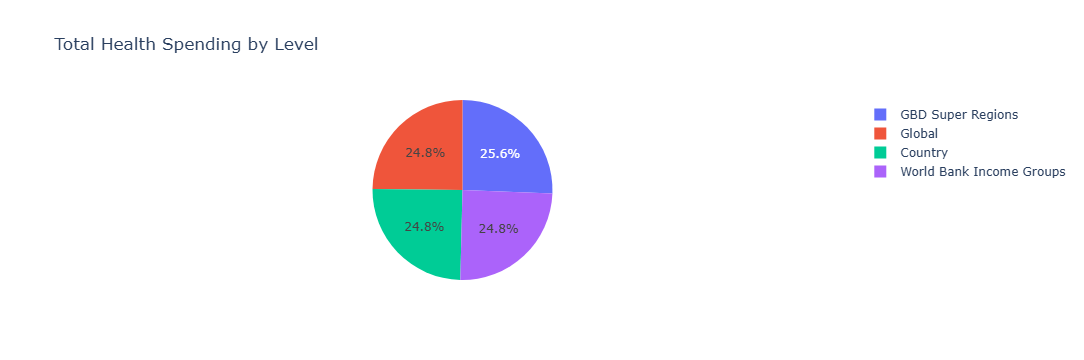

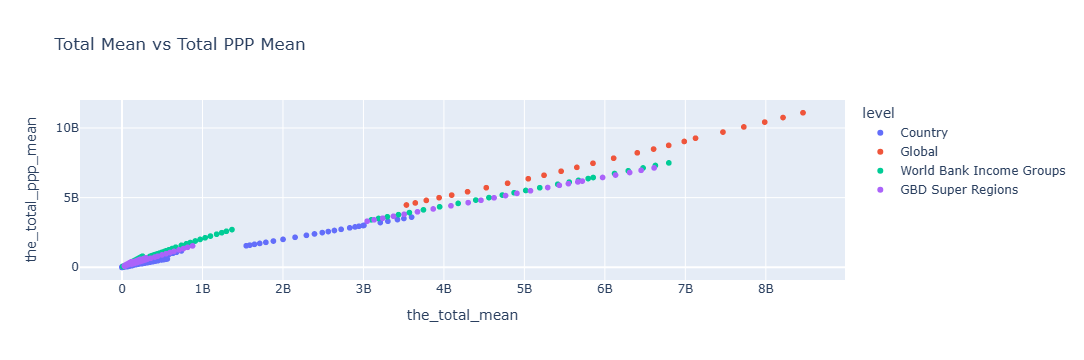

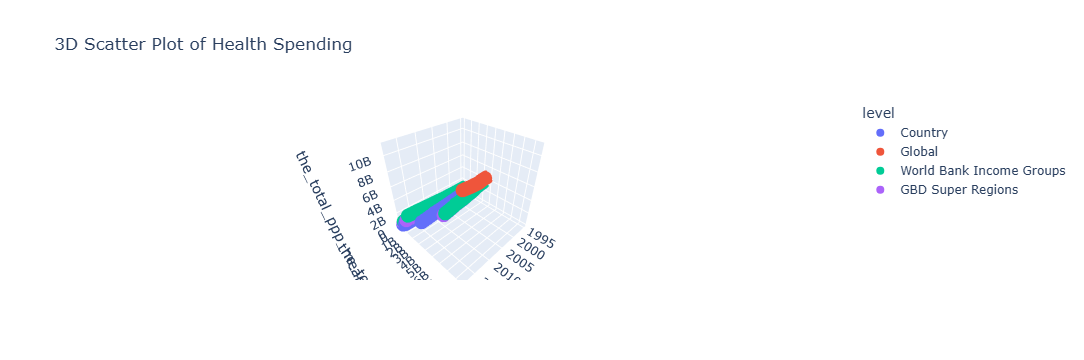

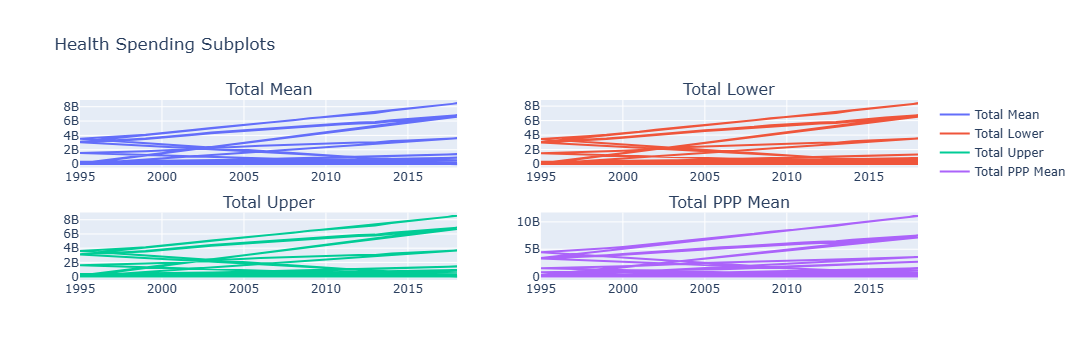

<ggplot: (640 x 480)>
<ggplot: (640 x 480)>
<ggplot: (640 x 480)>
<ggplot: (640 x 480)>
<ggplot: (640 x 480)>


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_histogram, geom_boxplot, facet_wrap, theme_minimal, theme, labs, stat_smooth, element_rect

# Wczytanie danych z pliku CSV
df = pd.read_csv('IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.csv')

# Podstawowe informacje o danych
print(df.info())
print(df.head())

# Wykresy z użyciem matplotlib i seaborn
def matplotlib_seaborn_plots():
    # Wykres liniowy
    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df['the_total_mean'], label='Total Mean', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'], df['the_total_lower'], label='Total Lower', color='red', marker='x', linestyle='--')
    plt.plot(df['year'], df['the_total_upper'], label='Total Upper', color='green', marker='s', linestyle='-.')
    plt.title('Total Health Spending Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Spending')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Wykres słupkowy
    plt.figure(figsize=(10, 6))
    sns.barplot(x='year', y='the_total_mean', data=df, hue='year', palette='viridis', legend=False)
    plt.title('Total Health Spending by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Spending')
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df['the_total_mean'], bins=30, kde=True, color='purple')
    plt.title('Distribution of Total Health Spending')
    plt.xlabel('Total Spending')
    plt.ylabel('Frequency')
    plt.show()

    # Wykres kołowy
    plt.figure(figsize=(8, 8))
    df_grouped = df.groupby('level')['the_total_mean'].sum()
    plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
    plt.title('Total Health Spending by Level')
    plt.show()

    # Wykres punktowy
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='the_total_mean', y='the_total_ppp_mean', data=df, hue='level', palette='deep', style='level')
    plt.title('Total Mean vs Total PPP Mean')
    plt.xlabel('Total Mean')
    plt.ylabel('Total PPP Mean')
    plt.show()

    # Wykres 3D
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['year'], df['the_total_mean'], df['the_total_ppp_mean'], c='blue', marker='o')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Mean')
    ax.set_zlabel('Total PPP Mean')
    plt.title('3D Scatter Plot of Health Spending')
    plt.show()

# Wykresy z użyciem plotly
def plotly_plots():
    # Wykres liniowy
    fig = px.line(df, x='year', y='the_total_mean', color='level', title='Total Health Spending Over Time')
    fig.show()

    # Wykres słupkowy
    fig = px.bar(df, x='year', y='the_total_mean', color='level', title='Total Health Spending by Year')
    fig.show()

    # Wykres kołowy
    fig = px.pie(df, names='level', values='the_total_mean', title='Total Health Spending by Level')
    fig.show()

    # Wykres punktowy
    fig = px.scatter(df, x='the_total_mean', y='the_total_ppp_mean', color='level', title='Total Mean vs Total PPP Mean')
    fig.show()

    # Wykres 3D
    fig = px.scatter_3d(df, x='year', y='the_total_mean', z='the_total_ppp_mean', color='level', title='3D Scatter Plot of Health Spending')
    fig.show()

    # Wykres z subplotami
    fig = make_subplots(rows=2, cols=2, subplot_titles=('Total Mean', 'Total Lower', 'Total Upper', 'Total PPP Mean'))
    fig.add_trace(go.Scatter(x=df['year'], y=df['the_total_mean'], name='Total Mean'), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['year'], y=df['the_total_lower'], name='Total Lower'), row=1, col=2)
    fig.add_trace(go.Scatter(x=df['year'], y=df['the_total_upper'], name='Total Upper'), row=2, col=1)
    fig.add_trace(go.Scatter(x=df['year'], y=df['the_total_ppp_mean'], name='Total PPP Mean'), row=2, col=2)
    fig.update_layout(title='Health Spending Subplots', showlegend=True)
    fig.show()

# Wykresy z użyciem plotnine
def plotnine_plots():
    # Wykres liniowy z linią trendu
    p = (ggplot(df, aes(x='year', y='the_total_mean', color='level'))
         + geom_line()
         + geom_point()
         + stat_smooth(method='lm', se=False)  # Użyj stat_smooth zamiast geom_smooth
         + labs(title='Total Health Spending Over Time with Trend Line', x='Year', y='Total Spending')
         + theme_minimal())
    print(p)

    # Wykres słupkowy
    p = (ggplot(df, aes(x='year', y='the_total_mean', fill='level'))
         + geom_bar(stat='identity')
         + labs(title='Total Health Spending by Year', x='Year', y='Total Spending')
         + theme_minimal())
    print(p)

    # Wykres pudłowy
    p = (ggplot(df, aes(x='level', y='the_total_mean', fill='level'))
         + geom_boxplot()
         + labs(title='Boxplot of Total Health Spending by Level', x='Level', y='Total Spending')
         + theme_minimal())
    print(p)

    # Wykres z facetowaniem
    p = (ggplot(df, aes(x='year', y='the_total_mean', color='level'))
         + geom_line()
         + facet_wrap('~level')
         + labs(title='Faceted Total Health Spending Over Time', x='Year', y='Total Spending')
         + theme_minimal())
    print(p)

    # Wykres z motywem
    p = (ggplot(df, aes(x='year', y='the_total_mean', color='level'))
         + geom_line()
         + labs(title='Total Health Spending Over Time with Custom Theme', x='Year', y='Total Spending')
         + theme_minimal()
         + theme(panel_background=element_rect(fill='lightgray')))
    print(p)

# Uruchomienie funkcji z wykresami
matplotlib_seaborn_plots()
plotly_plots()
plotnine_plots()